# Handwritten Digits Recognition

In [4]:
# Imports

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2024-07-02 23:14:28.793297: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train ,y_train) , (x_test, y_test) = mnist.load_data()

In [6]:
# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Add channel dimension (needed by the model)
x_train = np.expand_dims(x_train, axis=-1)  # shape becomes (num_samples, 28, 28, 1)
x_test = np.expand_dims(x_test, axis=-1)    # shape becomes (num_samples, 28, 28, 1)


In [7]:
# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [8]:
# Compile the model
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])


In [9]:
# Train the model
model.fit(x_train, y_train, epochs=20)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.9018 - loss: 0.3146
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9862 - loss: 0.0453
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9904 - loss: 0.0311
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9926 - loss: 0.0238
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9940 - loss: 0.0182
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9954 - loss: 0.0143
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9962 - loss: 0.0117
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9967 - loss: 0.0112
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9970 - loss: 0.0089
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9972 - loss: 0.0086
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9979 - loss: 0.0057
Epoch 12

In [10]:
# Assuming digit_model is your trained model
model.save('digit_model.h5')  # Save as .h5 file

In [11]:
# Evaluate the  train data of model
loss , accuracy = model.evaluate(x_train , y_train)
print (f"loss {loss} , accuracy {accuracy}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9986 - loss: 0.0046
loss 0.004349919036030769 , accuracy 0.9986166954040527


In [12]:
# Evaluate the  test  data of model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9877 - loss: 0.0780
Loss: 0.059014588594436646, Accuracy: 0.9905999898910522


In [13]:
# Evaluate the  test  data of model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9877 - loss: 0.0780
Loss: 0.059014588594436646, Accuracy: 0.9905999898910522


In [19]:
# Load and preprocess the custom image
image_path = "./MS Paint _ Microsoft Paint Online (12).png"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))  # Resize to 28x28 pixels
img = img.astype('float32') / 255.0  # Normalize pixel values to [0, 1]
img = np.expand_dims(img, axis=0)  # Add batch dimension

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


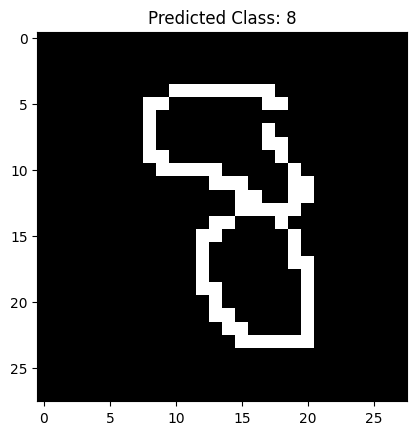

Prediction Result: [[1.26871964e-04 4.36154613e-03 1.15697016e-03 8.56903171e-08
  1.15139155e-05 5.40272333e-03 9.21437889e-03 7.31247710e-05
  9.79652226e-01 6.21045331e-07]]
Predicted Class: 8


In [20]:
# Make prediction
prediction = model.predict(img)
predicted_class = np.argmax(prediction)


# Display the image and predicted class
plt.imshow(img[0], cmap=plt.cm.binary)
plt.title(f"Predicted Class: {predicted_class}")
plt.show()

print("Prediction Result:", prediction)
print("Predicted Class:", predicted_class)
